<a href="https://colab.research.google.com/github/ampnb/Mind/blob/main/MW_complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy mne nolds

import numpy as np
import mne
import nolds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 41.8 MB/s eta 0:00:00


# Loading Data

In [2]:
meditation_raw = mne.io.read_raw_fif('tan_meditation_trial1.fif', preload=True)
mind_wandering_raw = mne.io.read_raw_fif('tan_mindwandering_trial1.fif', preload=True)

Opening raw data file tan_meditation_trial1.fif...
    Range : 0 ... 86316 =      0.000 ...   345.264 secs
Ready.


<ipython-input-2-b82ac53bc776>:1: RuntimeWarning: This filename (tan_meditation_trial1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  meditation_raw = mne.io.read_raw_fif('tan_meditation_trial1.fif', preload=True)


Reading 0 ... 86316  =      0.000 ...   345.264 secs...
Opening raw data file tan_mindwandering_trial1.fif...
    Range : 0 ... 84308 =      0.000 ...   337.232 secs
Ready.
Reading 0 ... 84308  =      0.000 ...   337.232 secs...


<ipython-input-2-b82ac53bc776>:2: RuntimeWarning: This filename (tan_mindwandering_trial1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  mind_wandering_raw = mne.io.read_raw_fif('tan_mindwandering_trial1.fif', preload=True)


# Preprocess EEG data

In [3]:
def preprocess_eeg(raw, low_freq, high_freq):
    #Apply bandpass filter
    raw_filtered = raw.filter(l_freq=low_freq, h_freq=high_freq)
    return raw_filtered.get_data(picks='eeg')

low_freq = 1 #Low cutoff frequency
high_freq = 50 #High cutoff frequency

meditation_filtered = preprocess_eeg(meditation_raw, low_freq,high_freq)
mind_wandering_filtered = preprocess_eeg(mind_wandering_raw, low_freq, high_freq)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 5

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished


# Compute Sample Entropy for each data

In [4]:
def calculate_sample_entropy(data, m, r):
    return nolds.sampen(data, emb_dim=m, tolerance=r)

m = 2  # Embedding dimension, adjust accordingly
r = 0.2 * np.std(meditation_filtered)  # Tolerance, usually set as 0.2 * standard deviation

meditation_entropy = calculate_sample_entropy(meditation_filtered, m, r)
mind_wandering_entropy = calculate_sample_entropy(mind_wandering_filtered, m, r)


# Classify and compare using Sample Entropy

In [5]:
print(f"Meditation Sample Entropy: {meditation_entropy}")
print(f"Mind-wandering Sample Entropy: {mind_wandering_entropy}")

if meditation_entropy < mind_wandering_entropy:
    print("Meditation EEG is less complex than mind-wandering EEG.")
else:
    print("Mind-wandering EEG is less complex than meditation EEG.")


Meditation Sample Entropy: 1.1930258346872404
Mind-wandering Sample Entropy: 1.1727613012335847
Mind-wandering EEG is less complex than meditation EEG.


#Plot

In [6]:
def plot_time_series(data, times, title):
    plt.figure(figsize=(12, 4))
    plt.plot(times, data.T)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(title)
    plt.show()

# Select a channel index to visualize
channel_index = 0

meditation_times = meditation_raw.times
mind_wandering_times = mind_wandering_raw.times

plot_time_series(meditation_filtered[channel_index], meditation_times, "Meditation EEG Time Series")
plot_time_series(mind_wandering_filtered[channel_index], mind_wandering_times, "Mind-wandering EEG Time Series")


NameError: ignored

In [7]:
def plot_psd(raw, title):
    plt.figure(figsize=(12, 4))
    raw.plot_psd(area_mode='range', dB=True, show=False)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Power Spectral Density (dB)")
    plt.title(title)
    plt.show()

plot_psd(meditation_raw, "Meditation EEG Power Spectral Density")
plot_psd(mind_wandering_raw, "Mind-wandering EEG Power Spectral Density")


NameError: ignored

# Higuchi's fractal dimension

In [8]:
!pip install numpy mne hfda

import numpy as np
import mne
import hfda
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for hfda: filename=hfda-0.1.1-py3-none-any.whl size=2139 sha256=a97ff7a23e913d7c51d5f01c655755bf30ea1a71e753e3944c33e67044ffe67c
  Stored in directory: /root/.cache/pip/wheels/ae/2c/72/48f1edf94fa2bf74d8896561391b539909292865a1391aebdd
Successfully built hfda


In [9]:
def calculate_higuchi_fd(data, k_max):
    return hfda.measure(data, k_max)

k_max = 5  # Maximum k for Higuchi's fractal dimension, adjust accordingly

meditation_higuchi_fd = calculate_higuchi_fd(meditation_filtered[channel_index], k_max)
mind_wandering_higuchi_fd = calculate_higuchi_fd(mind_wandering_filtered[channel_index], k_max)

print(f"Meditation Higuchi's Fractal Dimension: {meditation_higuchi_fd}")
print(f"Mind-wandering Higuchi's Fractal Dimension: {mind_wandering_higuchi_fd}")



Meditation Higuchi's Fractal Dimension: 1.349231466625253
Mind-wandering Higuchi's Fractal Dimension: 1.3305862375731423


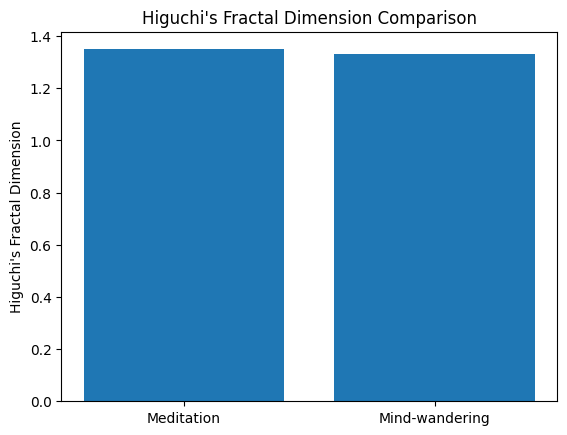

In [10]:
def plot_higuchi_fd_comparison(meditation_fd, mind_wandering_fd):
    states = ["Meditation", "Mind-wandering"]
    fractal_dimensions = [meditation_fd, mind_wandering_fd]

    plt.bar(states, fractal_dimensions)
    plt.ylabel("Higuchi's Fractal Dimension")
    plt.title("Higuchi's Fractal Dimension Comparison")
    plt.show()

plot_higuchi_fd_comparison(meditation_higuchi_fd, mind_wandering_higuchi_fd)

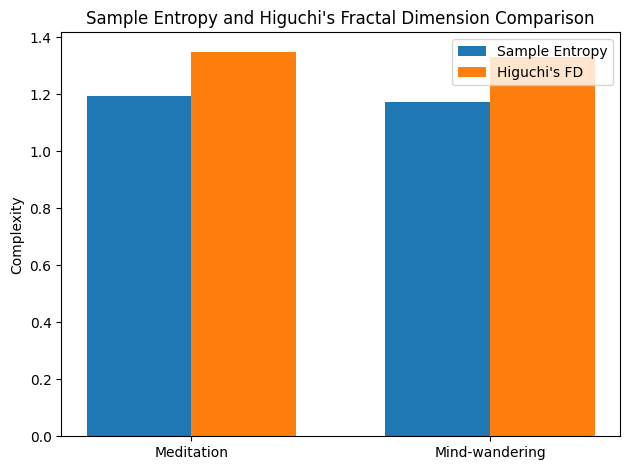

In [11]:
def plot_comparison(meditation_sample_entropy, mind_wandering_sample_entropy,
                    meditation_higuchi_fd, mind_wandering_higuchi_fd):
    states = ["Meditation", "Mind-wandering"]
    x = np.arange(len(states))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width / 2, [meditation_sample_entropy, mind_wandering_sample_entropy],
                    width, label='Sample Entropy')
    rects2 = ax.bar(x + width / 2, [meditation_higuchi_fd, mind_wandering_higuchi_fd],
                    width, label="Higuchi's FD")

    ax.set_ylabel('Complexity')
    ax.set_title('Sample Entropy and Higuchi\'s Fractal Dimension Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(states)
    ax.legend()

    fig.tight_layout()
    plt.show()

plot_comparison(meditation_entropy, mind_wandering_entropy,
                meditation_higuchi_fd, mind_wandering_higuchi_fd)


The higher values of Higuchi's fractal dimension compared to Sample Entropy indicate that the EEG data, in both meditation and mind-wandering states, have a higher complexity when measured using Higuchi's fractal dimension. It's important to remember that both Sample Entropy and Higuchi's fractal dimension are measures of complexity, but they quantify different aspects of the data.

Sample Entropy measures the unpredictability or irregularity in a time series, focusing on the likelihood of repeating patterns. A higher Sample Entropy value suggests that the data is more irregular and less predictable.

Higuchi's fractal dimension, on the other hand, is a measure of the self-similarity or fractal structure of the data. A higher Higuchi's fractal dimension value suggests that the data exhibits more complex fractal characteristics.

The difference in complexity values between Sample Entropy and Higuchi's fractal dimension does not necessarily imply that one measure is superior to the other. Instead, it demonstrates that these measures capture different aspects of complexity in the EEG data. It's essential to consider both measures when analyzing your data, as each can provide unique insights into the underlying brain activity during meditation and mind-wandering states.

# Let's compute spectral power and coherence

In [12]:
import numpy as np
import mne
import matplotlib.pyplot as plt

!pip install --upgrade mne



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Compute Spectral power

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


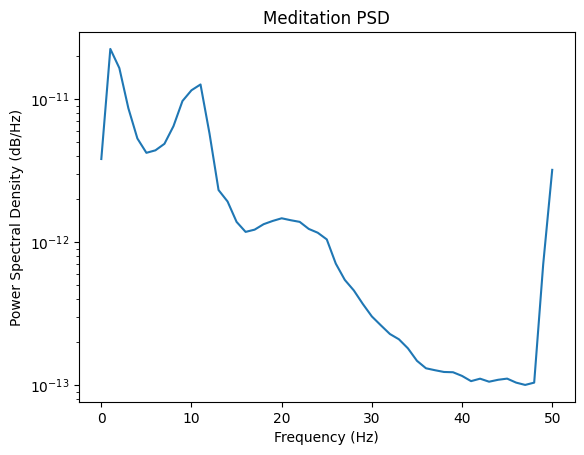

Effective window size : 1.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


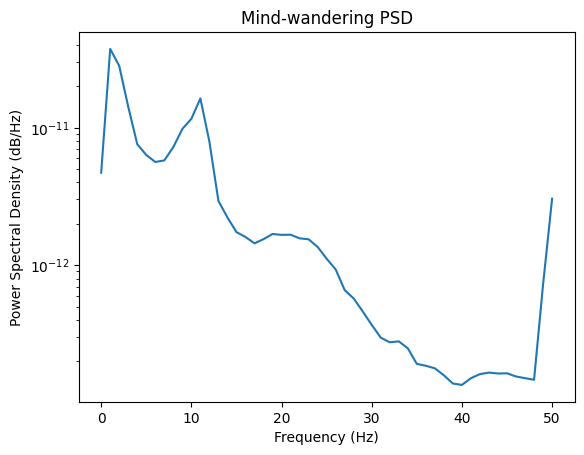

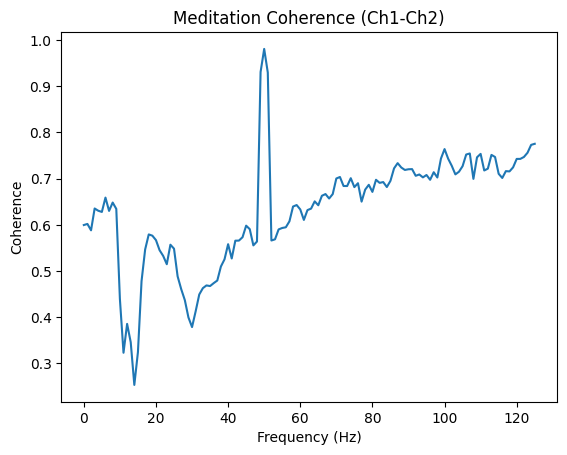

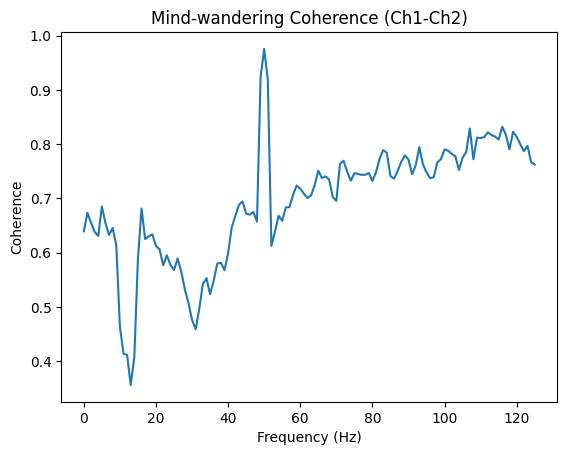

In [13]:
from mne.time_frequency import psd_array_welch
from scipy.signal import coherence

def plot_psd(data, sfreq, title):
    psd, freqs = psd_array_welch(data, sfreq, n_fft=int(sfreq), n_overlap=int(sfreq / 2), n_per_seg=None, fmax=50)
    plt.semilogy(freqs, psd.T)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title(title)
    plt.show()

def plot_coherence(data, sfreq, title):
    f, Cxy = coherence(data[0], data[1], fs=sfreq, nperseg=int(sfreq))
    plt.plot(f, Cxy)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Coherence')
    plt.title(title)
    plt.show()


sfreq = meditation_raw.info['sfreq']

plot_psd(meditation_filtered[channel_index], sfreq, "Meditation PSD")
plot_psd(mind_wandering_filtered[channel_index], sfreq, "Mind-wandering PSD")
plot_coherence(meditation_filtered[:2], sfreq, "Meditation Coherence (Ch1-Ch2)")
plot_coherence(mind_wandering_filtered[:2], sfreq, "Mind-wandering Coherence (Ch1-Ch2)")



In [14]:
from scipy import stats

# Calculate the T-test for the means of two independent samples of scores
t_statistic, p_value = stats.ttest_ind(meditation_filtered[channel_index], mind_wandering_filtered[channel_index])

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.27371059559344585
P-value: 0.7843073658167027


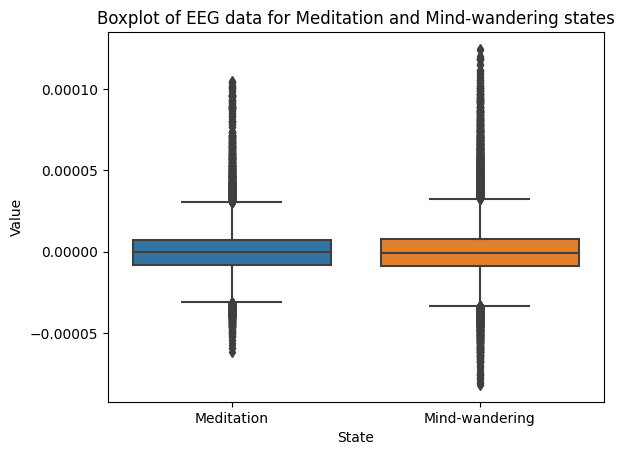

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert the data to a pandas DataFrame
data = pd.DataFrame({
    'State': ['Meditation'] * len(meditation_filtered[channel_index]) + ['Mind-wandering'] * len(mind_wandering_filtered[channel_index]),
    'Value': np.concatenate((meditation_filtered[channel_index], mind_wandering_filtered[channel_index]))
})

# Create a boxplot
sns.boxplot(x='State', y='Value', data=data)

plt.title('Boxplot of EEG data for Meditation and Mind-wandering states')
plt.show()


In [16]:
# from scipy.stats import mannwhitneyu

# # Calculate Mann-Whitney U test
# stat, p = mannwhitneyu(meditation_filtered[channel_index], mind_wandering_filtered[channel_index])

# print('Mann-Whitney U test:')
# print('U =', stat)
# print('p-value =', p)


Mann-Whitney U test:
U = 3664614452.0
p-value = 0.01069612059660841
